In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['savefig.facecolor'] = 'white'
sns.set(font="Yu Gothic")

%matplotlib inline
import japanize_matplotlib
import datetime as dt
import time
import sys
sys.path.append("../")
import os

import modules
import modules.self_made_modules as mymodule
import src.plotter as srcplt
import src.diff as diff

In [2]:
class Numdiff:
    def __init__(self,date) -> None:
        srcplot = srcplt.Plotter(date)
        self.obs_df = srcplot.getter("o")
        self.msm_df = srcplot.getter("m")
        self.obs_cloud = self.obs_df["雲量"]
        self.msm_cloud = self.msm_df["ncld"]
    
    def culc_diff(self):
        return self.obs_cloud - self.msm_cloud

In [3]:
date = dt.date(2022,1,1)
a = Numdiff(date)
a.culc_diff()

all_diff = a.culc_diff()
date += dt.timedelta(days=1)

for i in range(365):
    print(f"\r{date}",end="")
    try:
        numdiff = Numdiff(date)
    except:
        break
    tmp = numdiff.culc_diff()
    all_diff = pd.concat([all_diff,tmp])
    date += dt.timedelta(days=1)
all_diff.rename("cloud_diff",inplace=True)

2022-02-06

日付
2022-01-01 00:00:00    4.999998
2022-01-01 01:00:00    4.999998
2022-01-01 02:00:00    4.999998
2022-01-01 03:00:00    4.999998
2022-01-01 04:00:00    4.999998
                         ...   
2022-02-05 19:00:00    1.804998
2022-02-05 20:00:00    1.999998
2022-02-05 21:00:00    0.898331
2022-02-05 22:00:00   -4.980002
2022-02-05 23:00:00   -3.368335
Name: cloud_diff, Length: 864, dtype: float64

---
csvにして出力した

測定していない時間の信頼度めちゃ低いけどいったん全部で見てみる

In [2]:
cloud_diff = pd.read_csv("../csv/all_diff.csv",index_col="日付")
cloud_diff.index = pd.to_datetime(cloud_diff.index)
cloud_diff["cloud_diff"] = cloud_diff["cloud_diff"].apply(lambda x: round(x,2))
cloud_diff["date"] = cloud_diff.index
cloud_diff["hour"] = cloud_diff["date"].apply(lambda x:x.hour)
cloud_diff_3 = cloud_diff[cloud_diff["hour"]%3 == 0]

In [3]:
cloud_diff_3.head()

,cloud_diff,date,hour
日付,,,
2022-01-01 00:00:00,5.0,2022-01-01 00:00:00,0
2022-01-01 03:00:00,5.0,2022-01-01 03:00:00,3
2022-01-01 06:00:00,5.0,2022-01-01 06:00:00,6
2022-01-01 09:00:00,-0.0,2022-01-01 09:00:00,9
2022-01-01 12:00:00,-0.0,2022-01-01 12:00:00,12


In [4]:
cloud_diff.head()

,cloud_diff,date,hour
日付,,,
2022-01-01 00:00:00,5.0,2022-01-01 00:00:00,0
2022-01-01 01:00:00,5.0,2022-01-01 01:00:00,1
2022-01-01 02:00:00,5.0,2022-01-01 02:00:00,2
2022-01-01 03:00:00,5.0,2022-01-01 03:00:00,3
2022-01-01 04:00:00,5.0,2022-01-01 04:00:00,4


In [5]:
cloud_diff[cloud_diff["date"].dt.month == 2]

,cloud_diff,date,hour
日付,,,
2022-02-01 00:00:00,4.27,2022-02-01 00:00:00,0
2022-02-01 01:00:00,5.00,2022-02-01 01:00:00,1
2022-02-01 02:00:00,5.00,2022-02-01 02:00:00,2
2022-02-01 03:00:00,5.00,2022-02-01 03:00:00,3
2022-02-01 04:00:00,12.76,2022-02-01 04:00:00,4
...,...,...,...
2022-02-28 19:00:00,5.21,2022-02-28 19:00:00,19
2022-02-28 20:00:00,6.00,2022-02-28 20:00:00,20
2022-02-28 21:00:00,9.07,2022-02-28 21:00:00,21


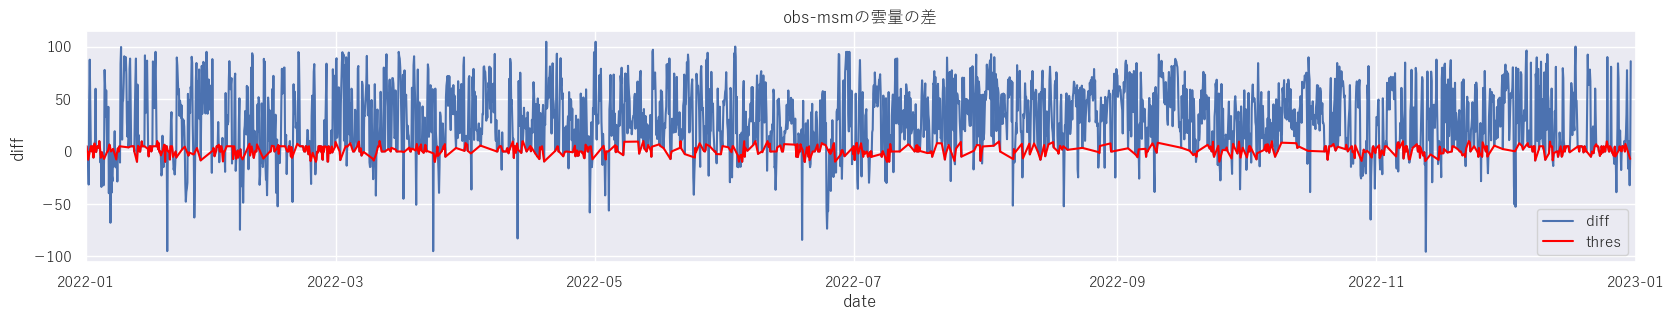

In [6]:
d_3 = diff.Diff(cloud_diff_3)
d_3.plot()

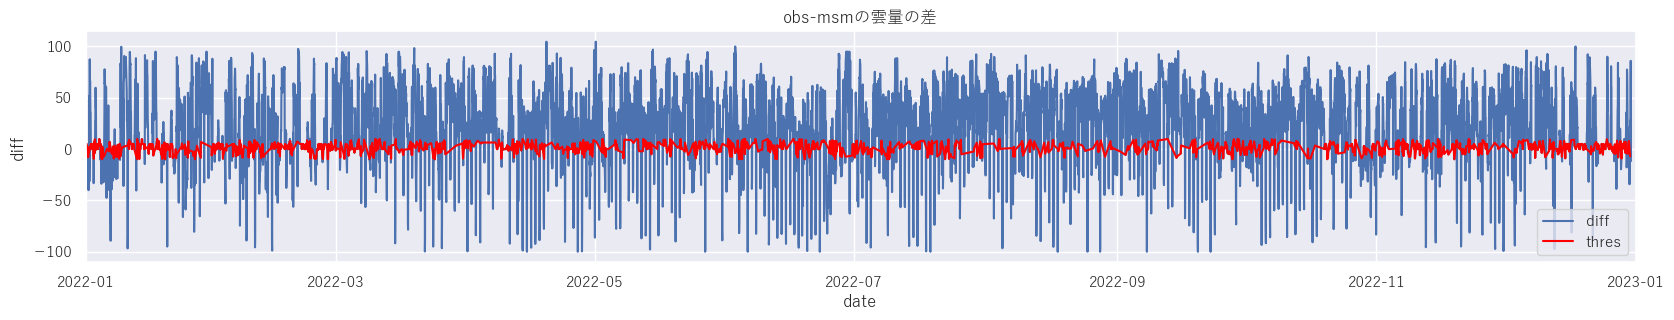

In [7]:
d = diff.Diff(cloud_diff)
d.plot()

In [8]:
cloud_diff.describe()

,cloud_diff,hour
count,8736.000000,8736.000000
mean,21.989141,11.500000
std,34.589210,6.922583
min,-100.000000,0.000000
25%,0.070000,5.750000
50%,19.715000,11.500000
75%,48.537500,17.250000
max,104.610000,23.000000


In [9]:
cloud_diff_3.describe()

,cloud_diff,hour
count,2912.000000,2912.000000
mean,27.533173,10.500000
std,30.778447,6.875044
min,-95.560000,0.000000
25%,3.370000,5.250000
50%,24.110000,10.500000
75%,51.545000,15.750000
max,104.610000,21.000000


In [42]:
d_3.describe(month=8)

,cloud_diff,hour
count,248.000000,248.000000
mean,38.531210,10.500000
std,26.502614,6.887764
min,-52.220000,0.000000
25%,18.907500,5.250000
50%,43.965000,10.500000
75%,57.590000,15.750000
max,92.750000,21.000000
